In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# import OreAutoCleaner as oac

In [4]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Life Expectancy Data.csv")
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


Inspected the dataset using several functions

In [122]:
# print(df.shape)
# print(df.info())
# print(df.duplicated().sum())
# print(df.isnull().sum()*100/len(df))
# # print(df.describe())

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.columns = ('Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths','Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles','BMI', 'Under-five deaths','Polio', 'Total expenditure',
       'Diphtheria','HIV/AIDS','GDP', 'Population',
       'Thinness 1-19 years','Thinness 5:9 years',
       'Income composition of resources', 'Schooling')

In [6]:
df.dropna(inplace=True)

In [108]:
# print(df.isnull().sum()*100/len(df))

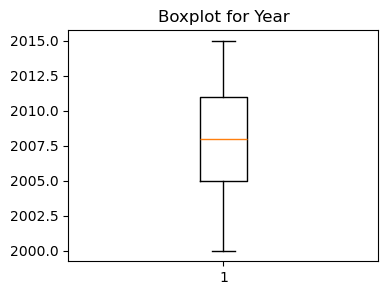

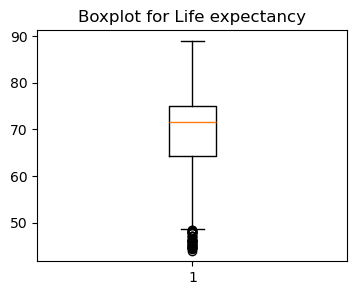

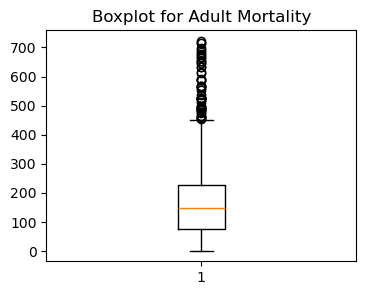

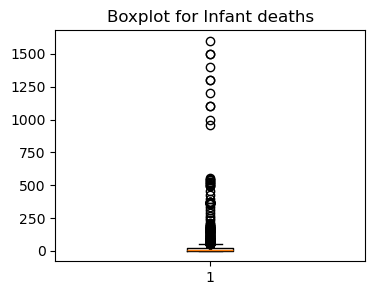

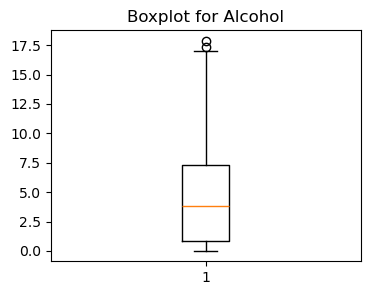

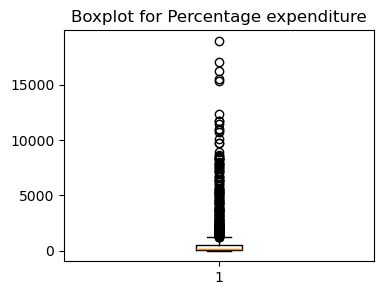

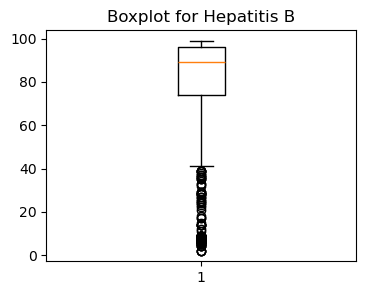

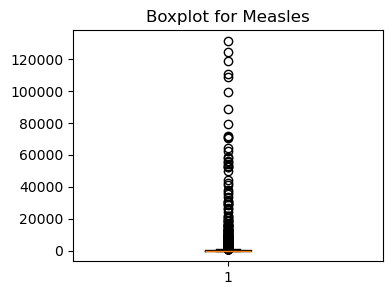

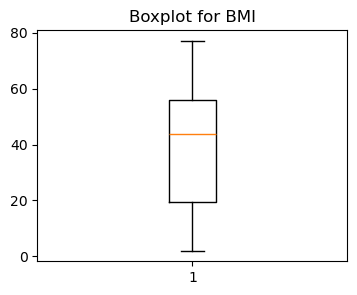

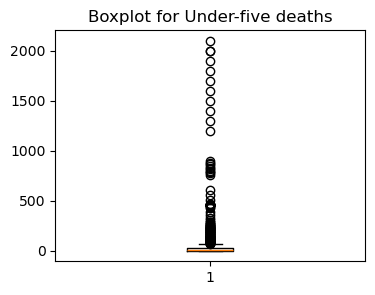

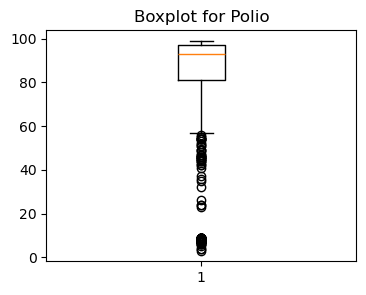

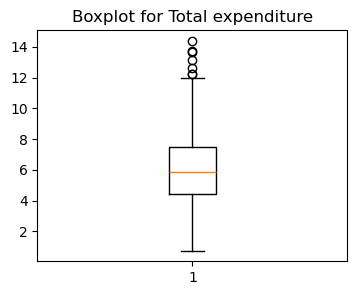

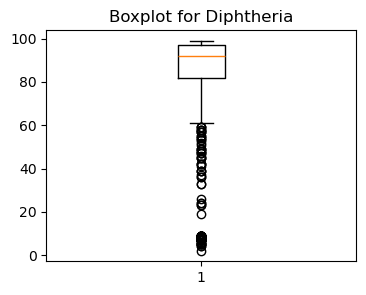

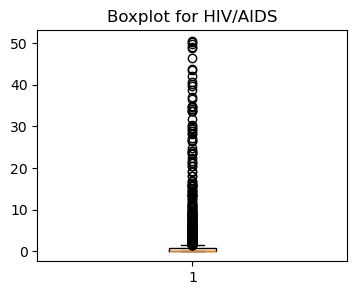

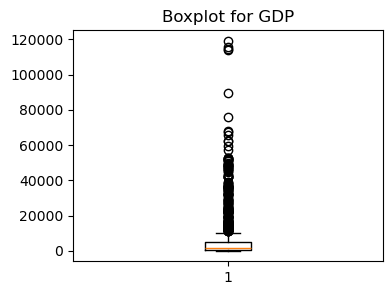

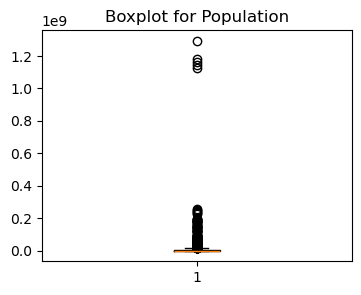

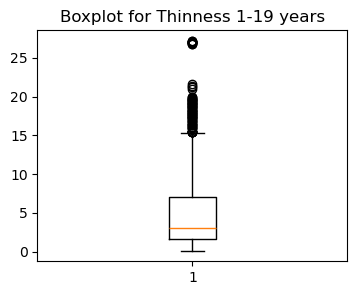

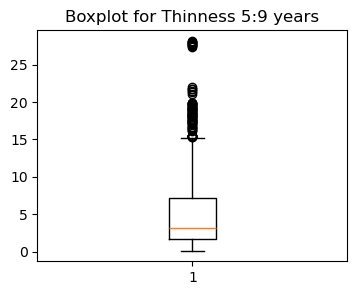

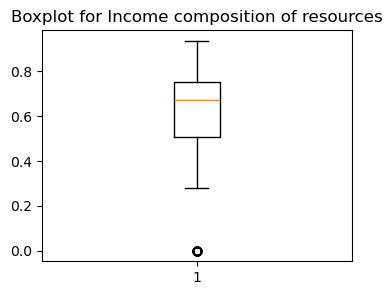

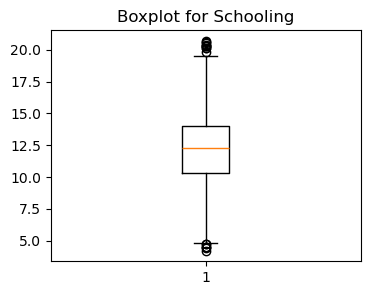

In [125]:
for cols in df.select_dtypes('number'):
    plt.figure(figsize = (4,3))
    plt.boxplot(df.select_dtypes('number')[cols])
    plt.title(f'Boxplot for {cols}')
    plt.show()

In [110]:
# def detect_outliers(df):
#     q1 = np.percentile(df, 25)
#     q3 = np.percentile(df, 75)
#     iqr = q3-q1
#     lower_bound = q1 - 1.5*iqr
#     upper_bound = q3 + 1.5*iqr
#     return (df < lower_bound) | (df > upper_bound)

In [25]:
# outlier_mask = detect_outliers(df.select_dtypes('number'))

In [28]:
# df_cleaned = df[~outlier_mask.any(axis=1)].reset_index(drop=True)

In [148]:
low, high = df['Measles'].quantile([0.1, 0.99])

In [149]:
mask_area = df['Measles'].between(low, high)

In [150]:
df = df[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x1435eda5190>,
 'caps': [<matplotlib.lines.Line2D at 0x1435eda6180>,
 'boxes': [<matplotlib.lines.Line2D at 0x1435eda6300>],
 'medians': [<matplotlib.lines.Line2D at 0x1435eda53a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1435eda5bb0>],
 'means': []}

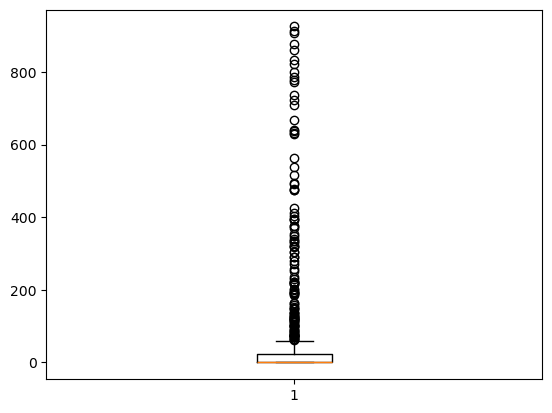

In [151]:
plt.boxplot(df['Measles'])

In [29]:
df_cleaned.head()

,Country,Year,Status,Life expentancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5:9 years,Income composition of resources,Schooling


In [30]:
corr = df.select_dtypes('number').corr()
corr

,Year,Life expentancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5:9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expentancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
Infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
Percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
Under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


In [31]:
df = df.drop(columns = 'Year')

Text(0.5, 1.0, 'Correlation heatmap')

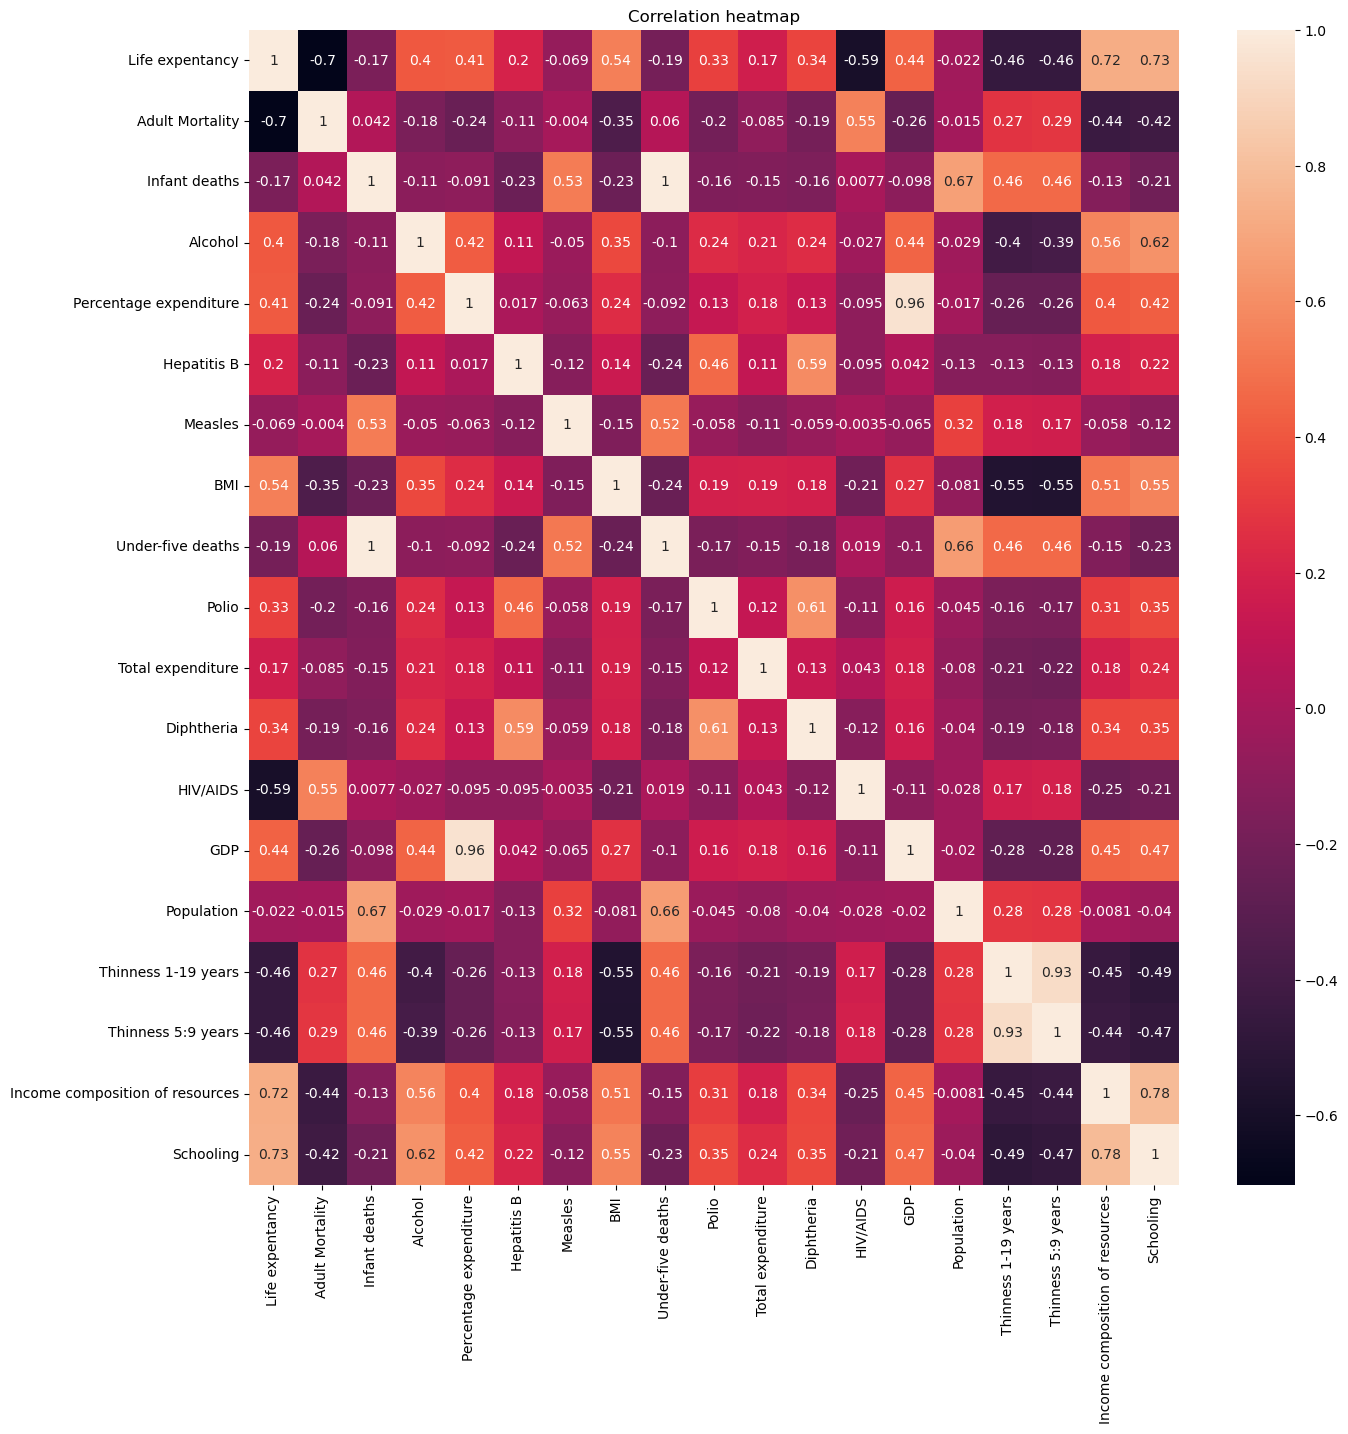

In [32]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize =(15,15))
sns.heatmap(corr, annot = True)
plt.title('Correlation heatmap')

In [18]:
y = df ['Life expectancy']
X = df.drop(columns = ['Life expectancy'])

In [154]:
print(y.shape)
print(X.shape)

(680,)
(680, 21)


In [8]:
# X = pd.get_dummies(X, columns = ['Country', 'Status'], drop_first = True)

In [9]:
enc = OrdinalEncoder()

In [23]:
X_enc = enc.fit_transform(X)

In [24]:
X_enc = pd.DataFrame(X_enc, columns = X.columns)

In [25]:
X_enc

,Country,Year,Status,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5:9 years,Income composition of resources,Schooling
0,0.0,15.0,1.0,214.0,62.0,0.0,638.0,51.0,325.0,117.0,...,3.0,509.0,34.0,0.0,492.0,1497.0,142.0,145.0,131.0,56.0
1,0.0,14.0,1.0,220.0,64.0,0.0,650.0,48.0,231.0,112.0,...,30.0,511.0,31.0,0.0,501.0,485.0,145.0,147.0,128.0,55.0
2,0.0,13.0,1.0,218.0,66.0,0.0,648.0,50.0,219.0,107.0,...,33.0,507.0,33.0,0.0,514.0,1487.0,147.0,149.0,124.0,54.0
3,0.0,12.0,1.0,221.0,69.0,0.0,668.0,53.0,421.0,102.0,...,38.0,541.0,36.0,0.0,533.0,1067.0,149.0,151.0,117.0,53.0
4,0.0,11.0,1.0,224.0,71.0,0.0,119.0,54.0,431.0,98.0,...,39.0,495.0,37.0,0.0,73.0,1017.0,152.0,153.0,108.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,132.0,4.0,1.0,368.0,27.0,342.0,0.0,54.0,30.0,187.0,...,38.0,433.0,34.0,146.0,404.0,1324.0,91.0,91.0,66.0,47.0
1645,132.0,3.0,1.0,366.0,26.0,318.0,0.0,4.0,309.0,183.0,...,4.0,383.0,37.0,152.0,402.0,1322.0,95.0,96.0,76.0,50.0
1646,132.0,2.0,1.0,61.0,25.0,347.0,0.0,58.0,183.0,179.0,...,43.0,384.0,39.0,155.0,67.0,336.0,10.0,11.0,84.0,55.0
1647,132.0,1.0,1.0,363.0,25.0,149.0,0.0,61.0,238.0,175.0,...,46.0,347.0,43.0,158.0,469.0,1318.0,14.0,15.0,84.0,53.0


In [27]:
from sklearn.model_selection import train_test_split

In [159]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

In [30]:
# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Function to train and evaluate
def train_and_evaluate_models(X, y): 
    
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test) 

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R² Score": r2
        })

    results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
    
    return results_df

results_df = train_and_evaluate_models(X_enc, y)

print(results_df)

               Model       MAE       MSE      RMSE  R² Score
2      Random Forest  1.109236  3.593169  1.895566  0.949408
3  Gradient Boosting  1.469015  4.608553  2.146754  0.935111
1      Decision Tree  1.549394  7.712939  2.777218  0.891401
4   Ridge Regression  2.368963  9.856002  3.139427  0.861227
0  Linear Regression  2.369098  9.856064  3.139437  0.861226
6        Elastic Net  2.368764  9.922276  3.149964  0.860294
5   Lasso Regression  2.372784  9.957208  3.155504  0.859802


In [162]:
9.002553e-01

0.9002553

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
model = model.fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [35]:
print(r2, mae, mse, rmse)

0.9494080122243674 1.1092363636363705 3.5931686666666773 1.8955655268723044


In [36]:
import pickle

In [37]:
# Save the model
with open("life_expectancy_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the StandardScaler
# with open("scaler.pkl", "wb") as scaler_file:
#     pickle.dump(scaler, scaler_file)

In [172]:
df['Country'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Chile',
       'Colombia', 'Comoros', 'Costa Rica', 'Cyprus', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Fiji', 'Gabon', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'Iraq', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati',
       'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro',
       'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland',
       'Portugal', 'Romania', 'Russian Federation', 'Rwanda',